<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/dev%2Fquiquex%2Fpatternrecognition/pr03_01_regresion_logistica_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimiento de patrones
## Dr. Carlos Villaseñor
### Regresión logística y SoftMax

# La función logística

1. Importamos paquetería

In [1]:
import numpy as np
import matplotlib.pyplot as plt

2. Esta es la función logística

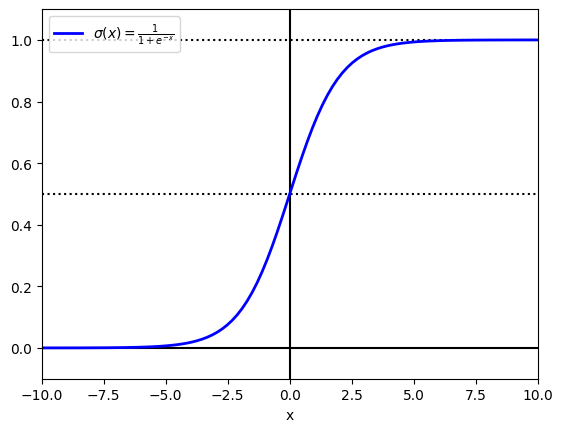

In [2]:
x = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-x))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(x, sig, "b-", linewidth=2, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
plt.xlabel("x")
plt.legend(loc="upper left", fontsize=10)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

# Importar datos

In [3]:
# Importar paquetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Lectura de datos

In [4]:
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/diabetes.csv'

--2025-02-03 00:15:52--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.004s  

2025-02-03 00:15:53 (5.74 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [5]:
# Leer datos
data = pd.read_csv('diabetes.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


# Exploración de datos

In [ ]:
no_show = pd.plotting.scatter_matrix(data)

In [ ]:
corr = data.corr()
print(corr)
import seaborn as sns
sns.heatmap(corr,
         xticklabels=corr.columns,
         yticklabels=corr.columns)

# Regresión logística

In [ ]:
## Primer método

# Eleguir variables
x = np.asanyarray(data[['Glucose']])
y = np.asanyarray(data[['Outcome']]).ravel()

# Dividir Train/Test
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

# Crear modelo y entrenar
logit=LogisticRegression(solver='lbfgs')
logit.fit(xtrain,ytrain)

# Calcular Score
print('Train: ', logit.score(xtrain,ytrain))
print('Test: ', logit.score(xtest,ytest))

g = np.linspace(0,200,50).reshape(-1,1)
prediction = logit.predict_proba(g)
plt.plot(xtrain,ytrain,'.b')
plt.plot(xtest,ytest,'.r')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.plot(g, prediction)

In [ ]:
## Segundo método

# Eleguir variables
x = np.asanyarray(data.drop(columns=['Outcome']))
y = np.asanyarray(data[['Outcome']]).ravel()

# Dividir Train/Test
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

# Importar nuevos paquetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Crear modelo y entrenar
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(solver='lbfgs')) ])

# Crear modelo y entrenar
model.fit(xtrain,ytrain)

# Calcular Score
print('Train: ', model.score(xtrain,ytrain))
print('Test: ', model.score(xtest,ytest))

# Explicación de variables

In [ ]:
coeff = np.abs(model.named_steps['logit'].coef_[0])
coeff = coeff / np.sum(coeff)
labels = list(data.drop(columns=['Outcome']).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh')
plt.xlabel('Importance')
print(features)

# Regresión polinomial logística

In [ ]:
## Tercer método

# Eleguir variables
x = np.asanyarray(data.drop(columns=['Outcome']))
y = np.asanyarray(data[['Outcome']]).ravel()

# Dividir Train/Test
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

# Importar nuevos paquetes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Crear modelo y entrenar
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(solver='lbfgs'))
                ])


model.fit(xtrain,ytrain)

# Calcular Score
print('Train: ', model.score(xtrain,ytrain))
print('Test: ', model.score(xtest,ytest))

# Regresión Softmax

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

In [ ]:
print(iris.DESCR)

In [ ]:
x = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

plt.plot(x[y==2, 0], x[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(x[y==1, 0], x[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(x[y==0, 0], x[y==0, 1], "yo", label="Iris-Setosa")

# Dividir Train/Test
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs")
softmax_reg.fit(xtrain, ytrain)

# Calcular Score
print('Train: ', softmax_reg.score(xtrain,ytrain))
print('Test: ', softmax_reg.score(xtest,ytest))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ypred = softmax_reg.predict(xtest)
cm = confusion_matrix(ytest, ypred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Setosa',
                                                        'Versicolor',
                                                        'Virginica']).plot()

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report: /n', classification_report(ytest, ypred))